# Assignment 1

## Author: Saurabh Sharma
## [Email: Samarthy@bu.edu](mailto:samarthy@bu.edu)

In [342]:
# I was using UV but let's make it self sufficient
%pip install pandas matplotlib seaborn numpy

Note: you may need to restart the kernel to use updated packages.


In [343]:
# All imports
import os
from pathlib import Path
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

## Task 1

Download the file chicago_violations.csv from the class Blackboard site. This dataset contains information about every building-related ordinance violation in Chicago, Illinois,
from 2008 to the present. 

> I copied the file to the data folder (as a habit). So the copied files is available at `./data/`


```bash
> ls -ltr ./data/chicago_violations.csv
-rw-r--r-- 1 samarthya samarthya 331153559 Oct 30 20:51 ./data/chicago_violations.csv
```

In [344]:
# Ensure outputs directory
out_dir = Path('outputs')
out_dir.mkdir(exist_ok=True)

csv_path = Path('data') / 'chicago_violations.csv'
print('Reading:', csv_path.resolve())

Reading: /home/samarthya/sourcebox/github.com/metad699/assignment1/data/chicago_violations.csv


In [345]:
# Listing all the local pip modules available
%pip list
%pip show pandas

Package                   Version
------------------------- -----------
anyio                     4.11.0
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.4.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.4.0
babel                     2.17.0
beautifulsoup4            4.14.2
bleach                    6.3.0
certifi                   2025.10.5
cffi                      2.0.0
charset-normalizer        3.4.4
comm                      0.2.3
contourpy                 1.3.3
cycler                    0.12.1
data                      0.4
debugpy                   1.8.17
decorator                 5.2.1
defusedxml                0.7.1
executing                 2.2.1
fastjsonschema            2.21.2
fonttools                 4.60.1
fqdn                      1.5.1
funcsigs                  1.0.2
future                    1.0.0
h11                       0.16.0
httpcore                  1.0.9
httpx              

## Task 2

Read the fie using pandas

```python
# Reading the file using the method read_csv
read_csv()
````

More information available [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

1. Describe the data set
2. How many rows and how many columns does your dataframe contain 

In [346]:

# Read CSV with pandas, try to infer dates later
df = pd.read_csv(csv_path, low_memory=False)

In [347]:
# 1. How many rows and columns
n_rows, n_cols = df.shape
print(f"\nNumber of rows: {n_rows}\nNumber of columns: {n_cols}")


Number of rows: 784225
Number of columns: 22


In [348]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding `NaN` values.
df.describe

<bound method NDFrame.describe of                                               ID DOCKET NUMBER   NOV NUMBER  \
0       9ed845888ab5e3bc6516adebba3319346b173012    23BT00101A   22P0675219   
1       b6df42910398cd4144f06d4ae36a25681848146b    15BT03446A   15WO442772   
2       de16ff67b156537113e2e7ecb1d18044e268aa3a    22BT02866A   22T0668607   
3       ff933be74d08113f113a3ba84fa0f2652a017991    21BT02435A   21V0652277   
4       fecf777cc540db1cf9abd2e72b0d839868dd2515    22BT03788A  22SH0674660   
...                                          ...           ...          ...   
784220  2be987d873279f28914340d5bb94f1ade6749f55    23BT02099A   23S0686227   
784221  426ab125b433243848e4c73b3fbc4093be328bcd    22BT02297A   22T0665695   
784222  b330a8a09acd231ff9650eae8aaa4e61ddd45e5b    23BT02100A   23W0686238   
784223  a6a6363f588abb0471009657d96316f8bbac4fa4    23BT02099A   23S0686227   
784224  ecce6ef33fec12916101cb34312fc1248ddfc911    23BT02068A   23N0685838   

                 

In [349]:
# 1. Describe dataset
print('\nDataframe info:')
df.info()


Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784225 entries, 0 to 784224
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     784225 non-null  object 
 1   DOCKET NUMBER          784122 non-null  object 
 2   NOV NUMBER             784225 non-null  object 
 3   ADDRESS                784225 non-null  object 
 4   STREET NUMBER          784225 non-null  int64  
 5   STREET DIRECTION       784219 non-null  object 
 6   STREET NAME            784225 non-null  object 
 7   STREET TYPE            776027 non-null  object 
 8   WARD                   781415 non-null  float64
 9   ISSUING DEPARTMENT     784225 non-null  object 
 10  HEARING DATE           784122 non-null  object 
 11  CASE DISPOSITION       766095 non-null  object 
 12  IMPOSED FINE           784225 non-null  float64
 13  ADMIN COSTS            784225 non-null  int64  
 14  LAST MODIFIED DATE 

In [350]:
print('\nFirst 5 rows:')
print(df.head())


First 5 rows:
                                         ID DOCKET NUMBER   NOV NUMBER  \
0  9ed845888ab5e3bc6516adebba3319346b173012    23BT00101A   22P0675219   
1  b6df42910398cd4144f06d4ae36a25681848146b    15BT03446A   15WO442772   
2  de16ff67b156537113e2e7ecb1d18044e268aa3a    22BT02866A   22T0668607   
3  ff933be74d08113f113a3ba84fa0f2652a017991    21BT02435A   21V0652277   
4  fecf777cc540db1cf9abd2e72b0d839868dd2515    22BT03788A  22SH0674660   

              ADDRESS  STREET NUMBER STREET DIRECTION STREET NAME STREET TYPE  \
0  5006 W GUNNISON ST           5006                W    GUNNISON          ST   
1      3241 W 62ND ST           3241                W        62ND          ST   
2      3811 W 61ST ST           3811                W        61ST          ST   
3    4259 W WILCOX ST           4259                W      WILCOX          ST   
4      1614 W 66TH ST           1614                W        66TH          ST   

   WARD ISSUING DEPARTMENT  ... IMPOSED FINE ADMIN CO

In [351]:
# Describe continutes with some clear demarcation of information
for i, c in enumerate(df.columns, start=1):
    print(f"{i:2}. {c}")

 1. ID
 2. DOCKET NUMBER
 3. NOV NUMBER
 4. ADDRESS
 5. STREET NUMBER
 6. STREET DIRECTION
 7. STREET NAME
 8. STREET TYPE
 9. WARD
10. ISSUING DEPARTMENT
11. HEARING DATE
12. CASE DISPOSITION
13. IMPOSED FINE
14. ADMIN COSTS
15. LAST MODIFIED DATE
16. VIOLATION DATE
17. VIOLATION CODE
18. VIOLATION DESCRIPTION
19. RESPONDENTS
20. LATITUDE
21. LONGITUDE
22. LOCATION


## Task 3

Choose a ward number at random without consulting anyone else.

> Now before I do this I need to make sure the ward column is present. Which I validated above => Column 9 = WARD

1. Chose a random ward (I chose 20)
2. Filter the dataset for the chosen ward and check the new dimensions
3. Identify three interesting facts about the ward.

In [352]:
# Convert to numeric and show the top 5 ward values by frequency, then choose one at random from those
wards_present = pd.to_numeric(df['WARD'], errors='coerce')
# coerce = convert invalid to 'NaN'

# value_counts on non-null wards
top5 = pd.Series(data=wards_present.dropna(), name="wards").value_counts().nlargest(5)
print('\nTop 5 WARD values (by count):')
print(top5)

# Choose randomly from the top 5 most common ward values
top5_values = top5.index.astype(int).tolist()
if len(top5_values) == 0:
    raise ValueError('No numeric wards detected')


Top 5 WARD values (by count):
wards
6.0     39556
16.0    36002
20.0    33505
7.0     31883
17.0    31488
Name: count, dtype: int64


In [353]:
# I chose random initially but then, every run might be different so defaulting to the random I chose
# chosen_ward = int(random.choice(top5_values))
# print('Chosen (random) ward (from top 5):', chosen_ward)

chosen_ward = 20
print('Chosen (random) ward (from top 5):', chosen_ward)

Chosen (random) ward (from top 5): 20


### Filtering based on ward = `20`

In [354]:
# Assign the numeric ward column from the already-computed series
df_ward = df[wards_present == chosen_ward].copy()
print('\nFiltered shape (chosen ward):', df_ward.shape)


Filtered shape (chosen ward): (33505, 22)


### How many records post filtering remain?

In [355]:
# 1. How many records now
print('Records in chosen ward:', len(df_ward))

Records in chosen ward: 33505


### Initial 6 rows of information

In [356]:
df_ward.head(6)

,ID,DOCKET NUMBER,NOV NUMBER,ADDRESS,STREET NUMBER,STREET DIRECTION,STREET NAME,STREET TYPE,WARD,ISSUING DEPARTMENT,...,IMPOSED FINE,ADMIN COSTS,LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION DESCRIPTION,RESPONDENTS,LATITUDE,LONGITUDE,LOCATION
6,4763f9c9dbe682bba3426e7b5bb83555fef080b3,22BT02301A,22S0665740,6729 S EVANS AVE,6729,S,EVANS,AVE,20.0,Buildings,...,1000.0,40,02/15/2023 04:39:07 PM,07/11/2022 09:00:00 AM,131016,"Screen outer doors, windows, and other outer o...",MARGIE ANN SMITH | JIMMIE SMITH JR,41.772240,-87.606860,"(41.772239861216065, -87.60685957443926)"
11,6fda326e407ea04daffc8ed2a4256191dc387f9c,22BT03637A,22S0673430,6542 S DR MARTIN LUTHER KING JR DR,6542,S,DR MARTIN LUTHER KING JR,DR,20.0,Buildings,...,0.0,0,02/15/2023 02:18:02 PM,11/04/2022 09:00:00 AM,190019,Arrange for inspection of premises. (13-12-100),PARKWAY GARDENS PRESERVATION GP LLC C/O IL COR...,41.775326,-87.615651,"(41.77532620177698, -87.61565141258355)"
21,5bee63261fa79677dfa69e6040eeeb1a67baadb6,22BT03637A,22S0673430,6542 S DR MARTIN LUTHER KING JR DR,6542,S,DR MARTIN LUTHER KING JR,DR,20.0,Buildings,...,0.0,0,02/15/2023 02:18:02 PM,11/04/2022 09:00:00 AM,197019,Install and maintain approved smoke detectors....,PARKWAY GARDENS PRESERVATION GP LLC C/O IL COR...,41.775326,-87.615651,"(41.77532620177698, -87.61565141258355)"
23,a7a4c3ed9e7ed9198144c5b77a9f544d8bdb6dd3,22BT02301A,22S0665740,6729 S EVANS AVE,6729,S,EVANS,AVE,20.0,Buildings,...,1000.0,40,02/15/2023 04:39:07 PM,07/11/2022 09:00:00 AM,008012,Provide partitions separating dwelling from ot...,MARGIE ANN SMITH | JIMMIE SMITH JR,41.772240,-87.606860,"(41.772239861216065, -87.60685957443926)"
31,95b28062f388bcacb3eee9b22db45892335e2a17,22BT03637A,22S0673430,6542 S DR MARTIN LUTHER KING JR DR,6542,S,DR MARTIN LUTHER KING JR,DR,20.0,Buildings,...,0.0,0,02/15/2023 02:18:02 PM,11/04/2022 09:00:00 AM,136016,Exterminate roaches and keep dwelling insect-f...,PARKWAY GARDENS PRESERVATION GP LLC C/O IL COR...,41.775326,-87.615651,"(41.77532620177698, -87.61565141258355)"
41,6803cfbf2c2fcdc2d2b82a359eddbbeecff6b5ac,22BT03637A,22S0673430,6542 S DR MARTIN LUTHER KING JR DR,6542,S,DR MARTIN LUTHER KING JR,DR,20.0,Buildings,...,0.0,0,02/15/2023 02:18:02 PM,11/04/2022 09:00:00 AM,073014,Repair or replace defective door. (13-196-550 ...,PARKWAY GARDENS PRESERVATION GP LLC C/O IL COR...,41.775326,-87.615651,"(41.77532620177698, -87.61565141258355)"


### Identify interesting facts about the WARD

In [357]:
# 2. Identify at least three interesting facts about your ward
# Part A: Data-driven facts from df_ward (the filtered dataset for this ward)
print(f"WARD {chosen_ward}: FACTS AND INFORMATION")

WARD 20: FACTS AND INFORMATION


In [358]:
most_common_street = df_ward['STREET NAME'].value_counts()
print(f" 1. Most common street : {most_common_street.index[0]}")
print(" Intersting fact: Martin Luther King Jr. was born Michael King Jr. but changed his name in 1934 to honor the Protestant reformer Martin Luther.")

most_common_street_type = df_ward['STREET TYPE'].value_counts()
print(f" 2. Most common street type : {most_common_street_type.index[0]}")
print(" Interesting fact: Avenues, in contrast to streets, usually run from north to south and have medians.")

# Get most common violation code
most_common_violation_code = df_ward['VIOLATION CODE'].value_counts().index[0]
least_common_violation_code = df_ward['VIOLATION CODE'].value_counts().index[-1]
# Get the description for that violation code
# Filter rows where VIOLATION CODE matches the most common code
violation_desc_for_code = df_ward[df_ward['VIOLATION CODE'] == most_common_violation_code]['VIOLATION DESCRIPTION'].iloc[0]

print(f" 3. Most common violation code : {most_common_violation_code}")
print(f"    Description: {violation_desc_for_code}")
print("""
        The top 10 most common violation codes for the past year are:
          CN190019: Arrange premise inspection
          EV1110: Maintain or repair elect eleva
          CN061014: Repair exterior wall
          EV1111: Maintain or repair hydro eleva
          CN070024: Repair porch system
          CN138106: Stop/remove nuisance
          CN101015: Repair interior walls/ceiling
          NC2011: Plans & permits req - contrctr
          CN070014: Repair exterior stair
          CN197019: Install smoke detectors
      """)
print(f" 4. Least common violation code : {least_common_violation_code}")


 1. Most common street : DR MARTIN LUTHER KING JR
 Intersting fact: Martin Luther King Jr. was born Michael King Jr. but changed his name in 1934 to honor the Protestant reformer Martin Luther.
 2. Most common street type : AVE
 Interesting fact: Avenues, in contrast to streets, usually run from north to south and have medians.
 3. Most common violation code : 190019
    Description: Arrange for inspection of premises. (13-12-100)

        The top 10 most common violation codes for the past year are:
          CN190019: Arrange premise inspection
          EV1110: Maintain or repair elect eleva
          CN061014: Repair exterior wall
          EV1111: Maintain or repair hydro eleva
          CN070024: Repair porch system
          CN138106: Stop/remove nuisance
          CN101015: Repair interior walls/ceiling
          NC2011: Plans & permits req - contrctr
          CN070014: Repair exterior stair
          CN197019: Install smoke detectors
      
 4. Least common violation code : E

## Task 4: Dealing with NA data

### Are there any NA's in the filtered data frame?

Help from [documentation](https://pandas.pydata.org/docs/reference/api/pandas.isna.html#pandas.isna)

In [359]:
help(pd.DataFrame.isna)

Help on function isna in module pandas.core.frame:

isna(self) -> 'DataFrame'
    Detect missing values.

    Return a boolean same-sized object indicating if the values are NA.
    NA values, such as None or :attr:`numpy.NaN`, gets mapped to True
    values.
    Everything else gets mapped to False values. Characters such as empty
    strings ``''`` or :attr:`numpy.inf` are not considered NA values
    (unless you set ``pandas.options.mode.use_inf_as_na = True``).

    Returns
    -------
    DataFrame
        Mask of bool values for each element in DataFrame that
        indicates whether an element is an NA value.

    See Also
    --------
    DataFrame.isnull : Alias of isna.
    DataFrame.notna : Boolean inverse of isna.
    DataFrame.dropna : Omit axes labels with missing values.
    isna : Top-level isna.

    Examples
    --------
    Show which entries in a DataFrame are NA.

    >>> df = pd.DataFrame(dict(age=[5, 6, np.nan],
    ...                        born=[pd.NaT, pd.Ti

### Are there any NA values in your dataframe filtered for the ward?

> Yes I used the isna()

In [360]:
# DEAL WITH NAs using isna()
print(f'\nCounting NA values in ward={chosen_ward} dataframe...')
na_counts = df_ward.isna().sum()
na_counts


Counting NA values in ward=20 dataframe...


ID                         0
DOCKET NUMBER              2
NOV NUMBER                 0
ADDRESS                    0
STREET NUMBER              0
STREET DIRECTION           0
STREET NAME                0
STREET TYPE               41
WARD                       0
ISSUING DEPARTMENT         0
HEARING DATE               2
CASE DISPOSITION         772
IMPOSED FINE               0
ADMIN COSTS                0
LAST MODIFIED DATE         0
VIOLATION DATE             0
VIOLATION CODE             0
VIOLATION DESCRIPTION      0
RESPONDENTS                0
LATITUDE                  16
LONGITUDE                 16
LOCATION                  16
dtype: int64

### What is the total number of NAs in the dataframe?

In [361]:
print('Total number of NA values in original dataframe:', na_counts.sum())

Total number of NA values in original dataframe: 865


### What is a complete case?

In [362]:
# Percentage of complete cases
print('A complete case is a row with no missing (NA) values in any column.')

A complete case is a row with no missing (NA) values in any column.


### What percentage of the rows in the dataframe are complete cases?

In [363]:
complete_cases = df_ward.dropna()
pct_complete = 100 * len(complete_cases) / len(df_ward) if len(df_ward)>0 else np.nan
print(f"\nPercent of rows that are complete cases: {pct_complete:.2f}%")


Percent of rows that are complete cases: 97.53%


### Convert any blank cells in the dataframe into NAs

In [364]:
# Convert blank strings to NA
blank_count_before = (df_ward == '').sum().sum()
print('Blank-string cells before conversion:', blank_count_before)

df_ward = df_ward.replace(r'^\s*$', np.nan, regex=True)

blank_count_after = (df_ward == '').sum().sum()
print('Blank-string cells after conversion:', blank_count_after)

Blank-string cells before conversion: 0
Blank-string cells after conversion: 0


### Save he missing table as a new CSV

In [365]:
# Generate per-variable missing table
missing_table = pd.DataFrame({'missing_count': df_ward.isna().sum()})
missing_table['missing_percent'] = 100 * missing_table['missing_count'] / len(df_ward)
missing_table = missing_table.sort_values('missing_count', ascending=False)
missing_table.to_csv(out_dir / 'missing_table.csv')
print('\nMissing values table saved to outputs/missing_table.csv')


Missing values table saved to outputs/missing_table.csv


### Show the table with missing %

In [366]:
# For formatting create a new copy
missing_table_display = missing_table.copy()

# Format and print missing_percent as .2f%
missing_table_display['missing_percent'] = missing_table_display['missing_percent'].apply(lambda x: f"{x:.2f}%")
missing_table_display

,missing_count,missing_percent
CASE DISPOSITION,772,2.30%
STREET TYPE,41,0.12%
LONGITUDE,16,0.05%
LOCATION,16,0.05%
LATITUDE,16,0.05%
DOCKET NUMBER,2,0.01%
HEARING DATE,2,0.01%
STREET DIRECTION,0,0.00%
ADDRESS,0,0.00%
NOV NUMBER,0,0.00%


## Task 5

Handling dates

### Which variables in the dataset contain the date values?

In [367]:
# Which variables contain date values? Check dtype first
print('\nColumn dtypes in df_ward:')
df_ward.dtypes


Column dtypes in df_ward:


ID                        object
DOCKET NUMBER             object
NOV NUMBER                object
ADDRESS                   object
STREET NUMBER              int64
STREET DIRECTION          object
STREET NAME               object
STREET TYPE               object
WARD                     float64
ISSUING DEPARTMENT        object
HEARING DATE              object
CASE DISPOSITION          object
IMPOSED FINE             float64
ADMIN COSTS                int64
LAST MODIFIED DATE        object
VIOLATION DATE            object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
RESPONDENTS               object
LATITUDE                 float64
LONGITUDE                float64
LOCATION                  object
dtype: object

> In the original dataset there are no column type stored as date, but looking at the data it is obvious the columns ending with `date` are supposed to be of type date.

In [368]:
# Find columns that are already datetime in df_ward
date_cols_existing = [c for c in df_ward.columns if pd.api.types.is_datetime64_any_dtype(df_ward[c])]
print(f"\nColumns with datetime dtype: {len(date_cols_existing)} found")
print(date_cols_existing)


Columns with datetime dtype: 0 found
[]


In [369]:
# Try to parse columns with 'date' in the name (in case they're strings)
date_cols_by_name = [c for c in df_ward.columns if 'date' in c.lower() and c not in date_cols_existing]
print('Columns with "date" in name :', date_cols_by_name)

Columns with "date" in name : ['HEARING DATE', 'LAST MODIFIED DATE', 'VIOLATION DATE']


### Changing in place to date for the columns identified above

In [370]:
# Parse date columns in-place using format='mixed'
for c in date_cols_by_name:
    df_ward[c] = pd.to_datetime(df_ward[c], format='mixed', errors='coerce')
    parsed_count = df_ward[c].notna().sum()
    print(f"  {c}: {parsed_count} dates parsed successfully")

# Now all date columns are datetime objects
all_date_cols = date_cols_existing + date_cols_by_name
print(f"\nTotal date columns available: {len(all_date_cols)}")

  HEARING DATE: 33503 dates parsed successfully
  LAST MODIFIED DATE: 33505 dates parsed successfully
  VIOLATION DATE: 33498 dates parsed successfully

Total date columns available: 3


### Post processing we now have three dates columns as evident above

In [371]:
print('All usable date columns:')
all_date_cols

All usable date columns:


['HEARING DATE', 'LAST MODIFIED DATE', 'VIOLATION DATE']

### Check the dtypes now

In [372]:
df_ward.dtypes

ID                               object
DOCKET NUMBER                    object
NOV NUMBER                       object
ADDRESS                          object
STREET NUMBER                     int64
STREET DIRECTION                 object
STREET NAME                      object
STREET TYPE                      object
WARD                            float64
ISSUING DEPARTMENT               object
HEARING DATE             datetime64[ns]
CASE DISPOSITION                 object
IMPOSED FINE                    float64
ADMIN COSTS                       int64
LAST MODIFIED DATE       datetime64[ns]
VIOLATION DATE           datetime64[ns]
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
RESPONDENTS                      object
LATITUDE                        float64
LONGITUDE                       float64
LOCATION                         object
dtype: object

In [373]:
df_ward['HEARING DATE']

6        2023-01-11
11       2023-02-15
21       2023-02-15
23       2023-01-11
31       2023-02-15
            ...    
784110   2023-09-11
784129   2023-09-11
784168   2023-09-12
784204   2023-09-12
784213   2023-09-12
Name: HEARING DATE, Length: 33505, dtype: datetime64[ns]

## Task 5 (other tasks)

- Now, add a new variable to the dataframe called CityDelay. CityDelay should be created based on the difference between the HearingDate and ViolationDate.
- What is your birthday? (just use the day/month for this, not the year)
- How many ordinance violations were issued on your birthday? What was the most common Case Disposition for those ordinance violations?


In [374]:
# Create CityDelay using the HEARING DATE and VIOLATION DATE columns
hearing_col = 'HEARING DATE'
violation_col = 'VIOLATION DATE'

if hearing_col in df_ward.columns and violation_col in df_ward.columns:
    df_ward['CityDelay'] = (df_ward[hearing_col] - df_ward[violation_col]).dt.days
    print(f'CityDelay column created (in days) using:')
    print(f'  HearingDate: {hearing_col}')
    print(f'  ViolationDate: {violation_col}')
    print(f'\nCityDelay statistics:')
    print(df_ward['CityDelay'].describe())
else:
    print(f'Error: Could not find columns {hearing_col} or {violation_col}')

# Save a small sample of processed dataframe (from df_ward)
df_ward.head(100).to_csv(out_dir / 'data_sample_head100.csv', index=False)
print(f'\nSaved sample head to outputs/data_sample_head100.csv')

CityDelay column created (in days) using:
  HearingDate: HEARING DATE
  ViolationDate: VIOLATION DATE

CityDelay statistics:
count    33496.000000
mean       247.114521
std        301.582658
min       -196.000000
25%        130.750000
50%        204.000000
75%        312.000000
max      21459.000000
Name: CityDelay, dtype: float64

Saved sample head to outputs/data_sample_head100.csv


### Birthday analysis

How many ordinance violations were issued?
What is the most common case dispostion for those ordinances?

In [375]:
# Birthday analysis
print('\nBirthday analysis.')

birthday_day = 5
birthday_month = 10

if birthday_day and birthday_month and violation_col in df_ward.columns:
    # Count violations on birthday (any year)
    is_bday = (df_ward[violation_col].dt.day == birthday_day) & (df_ward[violation_col].dt.month == birthday_month)
    bday_df = df_ward[is_bday]
    print(f"Violations on birthday ({birthday_day}/{birthday_month}): {len(bday_df)}")
    if len(bday_df) > 0 and 'CASE DISPOSITION' in bday_df.columns:
        print('Most common Case Disposition on that day:')
        print(bday_df['CASE DISPOSITION'].value_counts().head())


Birthday analysis.
Violations on birthday (5/10): 59
Most common Case Disposition on that day:
CASE DISPOSITION
Default       18
Not Liable    15
Non-Suit      13
Liable        13
Name: count, dtype: int64


## Task 6

Task begins from here onwards

In [376]:
print("GROUPBY ANALYSIS: Unique Values by Ward")

GROUPBY ANALYSIS: Unique Values by Ward


### Explore the dataset

Show ward be considered numeric or categorical variable?

In [377]:
# Group by WARD and show as a formatted table
# size will return a series so converted it to DF with reset_index with two columns
ward_counts = df.groupby('WARD').size().reset_index(name='Total Size')
ward_counts

,WARD,Total Size
0,0.0,71
1,1.0,16028
2,2.0,9088
3,3.0,15614
4,4.0,10105
5,5.0,21287
6,6.0,39556
7,7.0,31883
8,8.0,28911
9,9.0,21440


In [378]:
ward_counts.columns = ['Ward Number', 'Total Size']

# Display as table
print("\n### Violations by Ward ###")
print(ward_counts.to_string(index=False))

# Also display as pandas DataFrame for nice HTML rendering
ward_counts


### Violations by Ward ###
 Ward Number  Total Size
         0.0          71
         1.0       16028
         2.0        9088
         3.0       15614
         4.0       10105
         5.0       21287
         6.0       39556
         7.0       31883
         8.0       28911
         9.0       21440
        10.0       17079
        11.0       14520
        12.0       15386
        13.0        5424
        14.0        8874
        15.0       16383
        16.0       36002
        17.0       31488
        18.0        6997
        19.0        5076
        20.0       33505
        21.0       21177
        22.0       12321
        23.0        7129
        24.0       28993
        25.0       12400
        26.0       17242
        27.0       19514
        28.0       30336
        29.0       21772
        30.0       10975
        31.0       13312
        32.0       10268
        33.0       12191
        34.0       20382
        35.0       14627
        36.0        9596
        37.0       248

,Ward Number,Total Size
0,0.0,71
1,1.0,16028
2,2.0,9088
3,3.0,15614
4,4.0,10105
5,5.0,21287
6,6.0,39556
7,7.0,31883
8,8.0,28911
9,9.0,21440


### Should Ward be considered a numeric or categorical variable? Why?

Based on the values analyzed in the cell above I can inferit is a cateforical variable

- Discrete Labels — Ward values are 1, 2, 3... 43, 44, 50
- No Magnitude Meaning — Ward 20 isn't "twice as bad" as Ward 10
- No Natural Order — Can't compute mean ward = 14.5 or median ward meaningfully
- Identical Treatment — Each ward should be treated as a separate geographic area
- Operations Make No Sense — Adding/subtracting ward numbers produces garbage

In [379]:
# Group by WARD 
# Convert WARD to numeric
ward_numeric = pd.to_numeric(df['WARD'], errors='coerce')

# Select key columns to analyze
key_columns = ['STREET NAME', 'VIOLATION CODE', 'CASE DISPOSITION', 'VIOLATION DESCRIPTION']

# Create a summary table
summary_data = []
for ward in sorted(ward_numeric.dropna().unique()):
    ward_df = df[ward_numeric == ward]
    row = {'WARD': int(ward), 'Total Records': len(ward_df)}
    
    for col in key_columns:
        if col in df.columns:
            unique_count = ward_df[col].nunique()
            row[f'Unique {col}'] = unique_count
    
    summary_data.append(row)

# Create DataFrame
summary_table = pd.DataFrame(summary_data)

print("\n### Summary Table: Unique Counts by Ward ###")
print(summary_table.to_string(index=False))


### Summary Table: Unique Counts by Ward ###
 WARD  Total Records  Unique STREET NAME  Unique VIOLATION CODE  Unique CASE DISPOSITION  Unique VIOLATION DESCRIPTION
    0             71                   3                     38                        3                            38
    1          16028                 117                    555                        8                           551
    2           9088                 130                    496                        6                           496
    3          15614                  78                    509                        8                           507
    4          10105                  91                    475                        7                           475
    5          21287                  75                    472                        8                           471
    6          39556                  75                    544                        8                           541
  

### Save to CSV

In [380]:
# Save to CSV
summary_table.to_csv(out_dir / 'ward_summary_unique_counts.csv', index=False)
print(f"\nSaved to outputs/ward_summary_unique_counts.csv")


Saved to outputs/ward_summary_unique_counts.csv


In [381]:
# Show detailed view for chosen ward
print(f"DETAILED BREAKDOWN FOR WARD {chosen_ward}")

chosen_ward_data = df[ward_numeric == chosen_ward]

for col in key_columns:
    if col in df.columns:
        unique_vals = chosen_ward_data[col].nunique()
        print(f"\n{col}: {unique_vals} unique values")
        print(f"  Top 5 most common:")
        top_vals = chosen_ward_data[col].value_counts().head()
        for val, count in top_vals.items():
            print(f"    • {val}: {count} records")

DETAILED BREAKDOWN FOR WARD 20

STREET NAME: 103 unique values
  Top 5 most common:
    • DR MARTIN LUTHER KING JR: 2260 records
    • MICHIGAN: 1602 records
    • RHODES: 1352 records
    • ST LAWRENCE: 1186 records
    • EBERHART: 1093 records

VIOLATION CODE: 569 unique values
  Top 5 most common:
    • 190019: 1868 records
    • 070024: 1388 records
    • 061014: 1201 records
    • 196029: 1078 records
    • 104015: 821 records

CASE DISPOSITION: 8 unique values
  Top 5 most common:
    • Liable: 11513 records
    • Non-Suit: 9992 records
    • Default: 5366 records
    • Not Liable: 4339 records
    • Continuance: 1300 records

VIOLATION DESCRIPTION: 567 unique values
  Top 5 most common:
    • Arrange for inspection of premises. (13-12-100): 1868 records
    • Repair or replace defective or missing members of porch system. (13-196-570): 1388 records
    • Repair exterior wall. (13-196-010, 13-196-530 B): 1201 records
    • Post name, address, and telephone of owner, owner's agent

### Task 6.2 What is the correlation between imposed fine and admin costs?

Correlation in the ward that I have chosen == 20

### 6.2.1 What can you say about the strength of this correlation?

In [382]:
# Correlation between Imposed Fine and Admin Costs
print("QUESTION 2: Correlation between Imposed Fine and Admin Costs")

QUESTION 2: Correlation between Imposed Fine and Admin Costs


The **Pearson correlation coefficient** (often denoted as `r` for a sample or `p` for a population), is a statistical measure that quantifies the linear correlation between two sets of continuous data, `x` and `y`

In [383]:
# Define the fine and admin cost columns directly
fine_col = 'IMPOSED FINE'
admin_col = 'ADMIN COSTS'

# Convert to numeric
df_ward[fine_col] = pd.to_numeric(df_ward[fine_col], errors='coerce')
df_ward[admin_col] = pd.to_numeric(df_ward[admin_col], errors='coerce')

# Remove NaN values for correlation
valid_data = df_ward[[fine_col, admin_col]].dropna()

if len(valid_data) > 0:
    print(f"\nColumns analyzed:")
    print(f"  • Fine column: {fine_col}")
    print(f"  • Admin cost column: {admin_col}")
    print(f"  • Valid records (non-null both): {len(valid_data)}")
    
    # Compute correlation
    correlation = valid_data[fine_col].corr(valid_data[admin_col])
    print(f"Pearson correlation coefficient: {correlation:.4f}")
    
    # Interpret correlation
    if abs(correlation) < 0.3:
        strength = "WEAK"
    elif abs(correlation) < 0.7:
        strength = "MODERATE"
    else:
        strength = "STRONG"
    
    direction = "positive" if correlation > 0 else "negative"
    
    print(f"Strength: {strength}")
    print(f"Direction: {direction}")
    
    


Columns analyzed:
  • Fine column: IMPOSED FINE
  • Admin cost column: ADMIN COSTS
  • Valid records (non-null both): 33505
Pearson correlation coefficient: 0.2377
Strength: WEAK
Direction: positive


### Corelation analysis

In [384]:
print(f"""
• Correlation = {correlation:.4f}: {strength} {direction} relationship
• Meaning: {'As imposed fines increase, admin costs tend to increase' if correlation > 0 else 'As imposed fines increase, admin costs tend to decrease'}
• Strength insight: 
    - If 'WEAK': Fine amount and admin costs are largely independent
    - If 'MODERATE': There's some relationship but other factors matter too
    - If 'STRONG': Fine and admin costs move together closely

The {strength.lower()} {direction} correlation (r={correlation:.4f}) suggests that:
    → Imposed fines and admin costs are {'somewhat' if abs(correlation) < 0.7 else ''} related
    → Different violations likely have different penalty structures
    → City may assign admin costs based on factors other than fine amount
    """)
    


• Correlation = 0.2377: WEAK positive relationship
• Meaning: As imposed fines increase, admin costs tend to increase
• Strength insight: 
    - If 'WEAK': Fine amount and admin costs are largely independent
    - If 'MODERATE': There's some relationship but other factors matter too
    - If 'STRONG': Fine and admin costs move together closely

The weak positive correlation (r=0.2377) suggests that:
    → Imposed fines and admin costs are somewhat related
    → Different violations likely have different penalty structures
    → City may assign admin costs based on factors other than fine amount
    


### 6.3 Most common street in the ward?

In [385]:
most_common_street_type = df_ward['STREET TYPE'].value_counts()
print(f" 2. Most common street type : {most_common_street_type.index[0]}")

 2. Most common street type : AVE


### 6.3.1 Is it the same street type as the one you live in?

> No I do not like in the same street type.

### 6.4 How many unique Violation Description are there in your data? How many unique Violation Code values are there in your data?

In [386]:
# Count unique Violation Description and Violation Code values in Ward 20
print(f"UNIQUE VIOLATION VALUES IN WARD {chosen_ward}")

unique_violation_codes = df_ward['VIOLATION CODE'].nunique()
unique_violation_descriptions = df_ward['VIOLATION DESCRIPTION'].nunique()

print(f"\nUnique VIOLATION CODE values: {unique_violation_codes}")
print(f"Unique VIOLATION DESCRIPTION values: {unique_violation_descriptions}")

print(f"\nTotal records in Ward {chosen_ward}: {len(df_ward)}")
print(f"Average violations per unique code: {len(df_ward) / unique_violation_codes:.2f}")

UNIQUE VIOLATION VALUES IN WARD 20

Unique VIOLATION CODE values: 569
Unique VIOLATION DESCRIPTION values: 567

Total records in Ward 20: 33505
Average violations per unique code: 58.88


In [387]:
# Show relationship between codes and descriptions
print(f"\n### Top 5 Most Common Violation Codes ###\n\n")
top_codes = df_ward['VIOLATION CODE'].value_counts().head(5)
for code, count in top_codes.items():
    desc = df_ward[df_ward['VIOLATION CODE'] == code]['VIOLATION DESCRIPTION'].iloc[0]
    print(f"{code}: {count} occurrences")
    print(f"   Description: {desc}\n")


### Top 5 Most Common Violation Codes ###


190019: 1868 occurrences
   Description: Arrange for inspection of premises. (13-12-100)

070024: 1388 occurrences
   Description: Repair or replace defective or missing members of porch system. (13-196-570)

061014: 1201 occurrences
   Description: Repair exterior wall. (13-196-010, 13-196-530 B)

196029: 1078 occurrences
   Description: Post name, address, and telephone of owner, owner's agent for managing, controlling or collecting rents, and any other person managing or controlling building conspicuously where accessible or visible to public way. (13-12-030)

104015: 821 occurrences
   Description: Replace broken, missing or defective window panes. (13-196-550 A)



### Task 7: Imposed fines

How do the average values for imposed fine vary from year to year? Show the averages for each year in your data. To answer this, use the year value from the Hearing Date as your grouping variable.

In [388]:
# Average Imposed Fine by Year (from HEARING DATE) in Ward 20
print("AVERAGE IMPOSED FINE BY YEAR (Ward 20)")

# Extract year from HEARING DATE and convert to integer
df_ward['Hearing_Year'] = df_ward['HEARING DATE'].dt.year.astype('Int64')  # Int64 handles NaN values
df_ward['Hearing_Year']

AVERAGE IMPOSED FINE BY YEAR (Ward 20)


6         2023
11        2023
21        2023
23        2023
31        2023
          ... 
784110    2023
784129    2023
784168    2023
784204    2023
784213    2023
Name: Hearing_Year, Length: 33505, dtype: Int64

In [389]:
# Convert IMPOSED FINE to numeric
df_ward['IMPOSED FINE'] = pd.to_numeric(df_ward['IMPOSED FINE'], errors='coerce')
df_ward['IMPOSED FINE'].sort_values(ascending=False).head(5)

450979    50000.0
496581    50000.0
575579    50000.0
642454    50000.0
148745    50000.0
Name: IMPOSED FINE, dtype: float64

In [390]:
# Group by year and calculate average fine
avg_fine_by_year = df_ward.groupby('Hearing_Year')['IMPOSED FINE'].agg([
    ('Count', 'size'),
    ('Average Fine', 'mean'),
    ('Median Fine', 'median'),
    ('Min Fine', 'min'),
    ('Max Fine', 'max'),
    ('Std Dev', 'std')
]).reset_index()

avg_fine_by_year

,Hearing_Year,Count,Average Fine,Median Fine,Min Fine,Max Fine,Std Dev
0,2008,3352,2065.610084,500.0,0.0,13500.0,3113.227396
1,2009,5237,1413.091465,260.0,0.0,11000.0,2333.009148
2,2010,3207,1033.715310,400.0,0.0,10500.0,1915.416057
3,2011,2678,998.431665,200.0,0.0,50000.0,2384.544966
4,2012,2467,932.509120,200.0,0.0,9500.0,1874.664368
5,2013,2008,1211.728088,0.0,0.0,50000.0,4028.552572
6,2014,1726,626.158749,0.0,0.0,8000.0,1428.662379
7,2015,1996,988.138778,0.0,0.0,50000.0,4538.706470
8,2016,2749,797.853765,0.0,0.0,50000.0,2229.250298
9,2017,1442,740.568655,0.0,0.0,14000.0,1875.947456


In [391]:
# Rename the Hearing_Year column to Year
avg_fine_by_year = avg_fine_by_year.rename(columns={'Hearing_Year': 'Year'})

print("\n Average Imposed Fine Statistics by Year \n")

avg_fine_by_year


 Average Imposed Fine Statistics by Year 



,Year,Count,Average Fine,Median Fine,Min Fine,Max Fine,Std Dev
0,2008,3352,2065.610084,500.0,0.0,13500.0,3113.227396
1,2009,5237,1413.091465,260.0,0.0,11000.0,2333.009148
2,2010,3207,1033.715310,400.0,0.0,10500.0,1915.416057
3,2011,2678,998.431665,200.0,0.0,50000.0,2384.544966
4,2012,2467,932.509120,200.0,0.0,9500.0,1874.664368
5,2013,2008,1211.728088,0.0,0.0,50000.0,4028.552572
6,2014,1726,626.158749,0.0,0.0,8000.0,1428.662379
7,2015,1996,988.138778,0.0,0.0,50000.0,4538.706470
8,2016,2749,797.853765,0.0,0.0,50000.0,2229.250298
9,2017,1442,740.568655,0.0,0.0,14000.0,1875.947456


In [392]:
# Save to CSV
avg_fine_by_year.to_csv(out_dir / 'average_fine_by_year.csv', index=False)

print(f"\n Saved to outputs/average_fine_by_year.csv")


 Saved to outputs/average_fine_by_year.csv


In [393]:
# Show trend summary as a table
print(f"\n YEAR-OVER-YEAR TREND \n")

# Create a summary dataframe for display
trend_summary = []
years = sorted([y for y in df_ward['Hearing_Year'].unique() if pd.notna(y)])
for year in years:
    avg = df_ward[df_ward['Hearing_Year'] == year]['IMPOSED FINE'].mean()
    count = len(df_ward[df_ward['Hearing_Year'] == year])
    trend_summary.append({
        'Year': int(year),
        'Count': count,
        'Average Fine': f"${avg:,.2f}"
    })

trend_df = pd.DataFrame(trend_summary)
print(trend_df.to_string(index=False))


 YEAR-OVER-YEAR TREND 

 Year  Count Average Fine
 2008   3352    $2,065.61
 2009   5237    $1,413.09
 2010   3207    $1,033.72
 2011   2678      $998.43
 2012   2467      $932.51
 2013   2008    $1,211.73
 2014   1726      $626.16
 2015   1996      $988.14
 2016   2749      $797.85
 2017   1442      $740.57
 2018   1507      $616.22
 2019   1826    $1,910.46
 2020    563      $787.03
 2021    767      $777.71
 2022    776      $709.02
 2023    763    $1,102.36
 2024    439      $160.36



 Line graph saved to outputs/imposed_fines_by_year.png


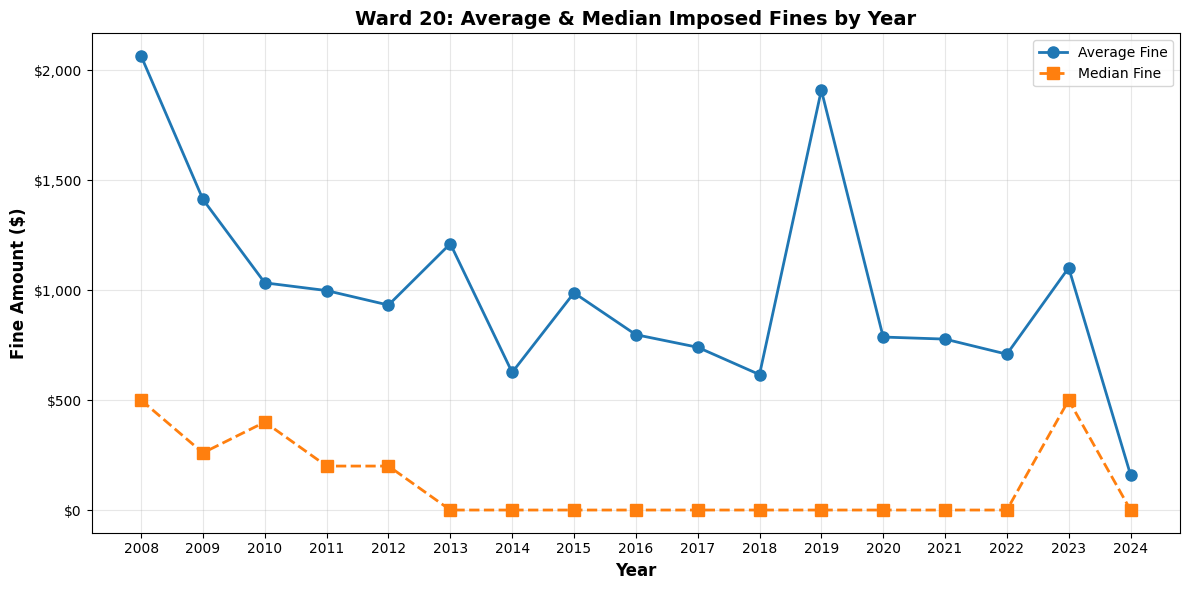

In [394]:
# Create line graph for year-over-year trend
plt.figure(figsize=(12, 6))

# Plot average fine by year
plt.plot(avg_fine_by_year['Year'], avg_fine_by_year['Average Fine'], 
         marker='o', linewidth=2, markersize=8, color='#1f77b4', label='Average Fine')

# Add median fine line for comparison
plt.plot(avg_fine_by_year['Year'], avg_fine_by_year['Median Fine'], 
         marker='s', linewidth=2, markersize=8, color='#ff7f0e', linestyle='--', label='Median Fine')

plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Fine Amount ($)', fontsize=12, fontweight='bold')
plt.title(f'Ward {chosen_ward}: Average & Median Imposed Fines by Year', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.xticks(avg_fine_by_year['Year'])
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.savefig(out_dir / 'imposed_fines_by_year.png', dpi=300, bbox_inches='tight')
print("\n Line graph saved to outputs/imposed_fines_by_year.png")
plt.show()

### 7.1 Why are 2024 Imposed Fines Lower?

In [395]:
# Get 2024 data
df_2024 = df_ward[df_ward['Hearing_Year'] == 2024]
df_prev_years = df_ward[df_ward['Hearing_Year'] < 2024]

In [396]:
print(f"2024 records: {len(df_2024)}")
print(f"Previous years records: {len(df_prev_years)}")

print(f"\n2024 IMPOSED FINE - Non-null count: {df_2024['IMPOSED FINE'].notna().sum()}")
print(f"2024 IMPOSED FINE - Null/Missing count: {df_2024['IMPOSED FINE'].isna().sum()}")
print(f"Percentage of 2024 with valid fines: {100 * df_2024['IMPOSED FINE'].notna().sum() / len(df_2024):.1f}%")


2024 records: 439
Previous years records: 33064

2024 IMPOSED FINE - Non-null count: 439
2024 IMPOSED FINE - Null/Missing count: 0
Percentage of 2024 with valid fines: 100.0%


In [397]:
print(f"\nPrevious years IMPOSED FINE - Non-null count: {df_prev_years['IMPOSED FINE'].notna().sum()}")
print(f"Previous years IMPOSED FINE - Null/Missing count: {df_prev_years['IMPOSED FINE'].isna().sum()}")
print(f"Percentage with valid fines: {100 * df_prev_years['IMPOSED FINE'].notna().sum() / len(df_prev_years):.1f}%")


Previous years IMPOSED FINE - Non-null count: 33064
Previous years IMPOSED FINE - Null/Missing count: 0
Percentage with valid fines: 100.0%


In [398]:
# Check if 2024 data is partial year
min_date_2024 = df_2024['HEARING DATE'].min()
max_date_2024 = df_2024['HEARING DATE'].max()
print(f"2024 Hearing Date Range: {min_date_2024.date()} to {max_date_2024.date()}")

# Compare months covered
months_2024 = df_2024['HEARING DATE'].dt.month.unique()
months_2024_sorted = sorted([int(m) for m in months_2024])

print(f"Months represented in 2024: {months_2024_sorted}")
print(f"Number of unique months in 2024: {len(months_2024_sorted)}")

2024 Hearing Date Range: 2024-01-02 to 2024-05-31
Months represented in 2024: [1, 2, 3, 4, 5]
Number of unique months in 2024: 5


In [399]:
print(f"\nVIOLATION DISTRIBUTION ")
# Check if 2024 has different violation types
print(f"\nTop 5 Violation Codes in 2024:")
print(df_2024['VIOLATION CODE'].value_counts().head())


VIOLATION DISTRIBUTION 

Top 5 Violation Codes in 2024:
VIOLATION CODE
190019    28
070024    27
061014    21
138106    15
070014    14
Name: count, dtype: int64


In [400]:
print(f"\nTop 5 Violation Codes in Previous Years:")
print(df_prev_years['VIOLATION CODE'].value_counts().head())


Top 5 Violation Codes in Previous Years:
VIOLATION CODE
190019    1840
070024    1361
061014    1180
196029    1077
104015     817
Name: count, dtype: int64


In [401]:
# Check average fine by violation code
print(f"\nAVERAGE FINE BY VIOLATION CODE")
code_2024 = df_2024.groupby('VIOLATION CODE')['IMPOSED FINE'].mean().sort_values(ascending=False)
code_prev = df_prev_years.groupby('VIOLATION CODE')['IMPOSED FINE'].mean().sort_values(ascending=False)

print(f"\nTop 5 highest average fines in 2024:")
print(code_2024.head())

print(f"\nTop 5 highest average fines in previous years:")
print(code_prev.head())


AVERAGE FINE BY VIOLATION CODE

Top 5 highest average fines in 2024:
VIOLATION CODE
EV1103    2000.000000
074024    1166.666667
063024    1166.666667
EV1111     666.666667
197019     642.857143
Name: IMPOSED FINE, dtype: float64

Top 5 highest average fines in previous years:
VIOLATION CODE
236060    11500.0
2320      11000.0
234050     7000.0
220094     7000.0
040063     6750.0
Name: IMPOSED FINE, dtype: float64


In [402]:
print(f"\nCONCLUSION")
print(f"""
POSSIBLE REASONS FOR LOWER 2024 AVERAGE FINES:

1. INCOMPLETE DATA FOR 2024:
   - 2024 data covers: {len(months_2024)} months ({sorted(months_2024)})
   - If 2024 is partial-year data, it may not represent full year patterns
   
""")


CONCLUSION

POSSIBLE REASONS FOR LOWER 2024 AVERAGE FINES:

1. INCOMPLETE DATA FOR 2024:
   - 2024 data covers: 5 months ([np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5)])
   - If 2024 is partial-year data, it may not represent full year patterns




### Task 8: Remove the following columns from the dataframe: ID and Docket Number

In [403]:
# Remove columns 'ID' and 'DOCKET NUMBER'
cols_to_drop = ['ID', 'DOCKET NUMBER']

print("Before dropping columns:")
print(f"df_ward shape: {df_ward.shape}")
print(f"Columns: {list(df_ward.columns)}")

# Drop columns
df_ward = df_ward.drop(columns=cols_to_drop, errors='ignore')

print(f"\nAfter dropping columns:")
print(f"df_ward shape: {df_ward.shape}")
print(f"Columns: {list(df_ward.columns)}")

Before dropping columns:
df_ward shape: (33505, 24)
Columns: ['ID', 'DOCKET NUMBER', 'NOV NUMBER', 'ADDRESS', 'STREET NUMBER', 'STREET DIRECTION', 'STREET NAME', 'STREET TYPE', 'WARD', 'ISSUING DEPARTMENT', 'HEARING DATE', 'CASE DISPOSITION', 'IMPOSED FINE', 'ADMIN COSTS', 'LAST MODIFIED DATE', 'VIOLATION DATE', 'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'RESPONDENTS', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'CityDelay', 'Hearing_Year']

After dropping columns:
df_ward shape: (33505, 22)
Columns: ['NOV NUMBER', 'ADDRESS', 'STREET NUMBER', 'STREET DIRECTION', 'STREET NAME', 'STREET TYPE', 'WARD', 'ISSUING DEPARTMENT', 'HEARING DATE', 'CASE DISPOSITION', 'IMPOSED FINE', 'ADMIN COSTS', 'LAST MODIFIED DATE', 'VIOLATION DATE', 'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'RESPONDENTS', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'CityDelay', 'Hearing_Year']


### Task 9: Create a new column called Season. 

Season should be created from the Violation Date variable. Rename the quarters so that Quarter 1 becomes Winter, Quarter 2 becomes Spring, Quarter 3 becomes Summer and Quarter 4 becomes Fall

In [404]:
# Create SEASON column from VIOLATION DATE
# Extract quarter from VIOLATION DATE and map to season names

# Define quarter to season mapping
quarter_to_season = {
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Fall'
}

In [405]:
# Extract quarter from VIOLATION DATE and map to season
df_ward['SEASON'] = df_ward['VIOLATION DATE'].dt.quarter.map(quarter_to_season)

df_ward.head(5)

,NOV NUMBER,ADDRESS,STREET NUMBER,STREET DIRECTION,STREET NAME,STREET TYPE,WARD,ISSUING DEPARTMENT,HEARING DATE,CASE DISPOSITION,...,VIOLATION DATE,VIOLATION CODE,VIOLATION DESCRIPTION,RESPONDENTS,LATITUDE,LONGITUDE,LOCATION,CityDelay,Hearing_Year,SEASON
6,22S0665740,6729 S EVANS AVE,6729,S,EVANS,AVE,20.0,Buildings,2023-01-11,Default,...,2022-07-11 09:00:00,131016,"Screen outer doors, windows, and other outer o...",MARGIE ANN SMITH | JIMMIE SMITH JR,41.772240,-87.606860,"(41.772239861216065, -87.60685957443926)",183.0,2023,Summer
11,22S0673430,6542 S DR MARTIN LUTHER KING JR DR,6542,S,DR MARTIN LUTHER KING JR,DR,20.0,Buildings,2023-02-15,Non-Suit,...,2022-11-04 09:00:00,190019,Arrange for inspection of premises. (13-12-100),PARKWAY GARDENS PRESERVATION GP LLC C/O IL COR...,41.775326,-87.615651,"(41.77532620177698, -87.61565141258355)",102.0,2023,Fall
21,22S0673430,6542 S DR MARTIN LUTHER KING JR DR,6542,S,DR MARTIN LUTHER KING JR,DR,20.0,Buildings,2023-02-15,Non-Suit,...,2022-11-04 09:00:00,197019,Install and maintain approved smoke detectors....,PARKWAY GARDENS PRESERVATION GP LLC C/O IL COR...,41.775326,-87.615651,"(41.77532620177698, -87.61565141258355)",102.0,2023,Fall
23,22S0665740,6729 S EVANS AVE,6729,S,EVANS,AVE,20.0,Buildings,2023-01-11,Default,...,2022-07-11 09:00:00,008012,Provide partitions separating dwelling from ot...,MARGIE ANN SMITH | JIMMIE SMITH JR,41.772240,-87.606860,"(41.772239861216065, -87.60685957443926)",183.0,2023,Summer
31,22S0673430,6542 S DR MARTIN LUTHER KING JR DR,6542,S,DR MARTIN LUTHER KING JR,DR,20.0,Buildings,2023-02-15,Non-Suit,...,2022-11-04 09:00:00,136016,Exterminate roaches and keep dwelling insect-f...,PARKWAY GARDENS PRESERVATION GP LLC C/O IL COR...,41.775326,-87.615651,"(41.77532620177698, -87.61565141258355)",102.0,2023,Fall


In [406]:
print("First 10 rows of VIOLATION DATE and SEASON:")
print(df_ward[['VIOLATION DATE', 'SEASON']].head(10))

First 10 rows of VIOLATION DATE and SEASON:
        VIOLATION DATE  SEASON
6  2022-07-11 09:00:00  Summer
11 2022-11-04 09:00:00    Fall
21 2022-11-04 09:00:00    Fall
23 2022-07-11 09:00:00  Summer
31 2022-11-04 09:00:00    Fall
41 2022-11-04 09:00:00    Fall
55 2022-11-04 09:00:00    Fall
56 2022-11-04 09:00:00    Fall
90 2022-07-11 09:00:00  Summer
96 2022-07-11 09:00:00  Summer


In [407]:
print("\n\nSeason distribution in Ward 20:")
print(df_ward['SEASON'].value_counts().sort_index())



Season distribution in Ward 20:
SEASON
Fall      7067
Spring    8835
Summer    8239
Winter    9357
Name: count, dtype: int64


### Task 10: Create a bar plot showing the counts of builing violations


 Bar plot saved to outputs/violations_by_season.png


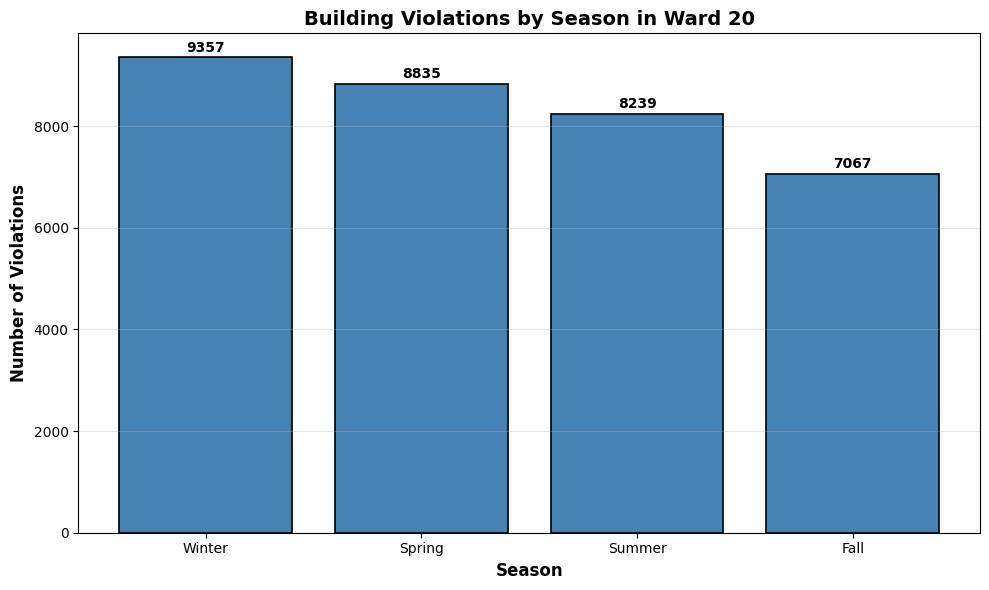

In [408]:
# Create a bar plot of violations by season
plt.figure(figsize=(10, 6))

season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_counts = df_ward['SEASON'].value_counts().sort_index() # Sort alphabetically
season_counts = season_counts.reindex(season_order)

plt.bar(season_counts.index, season_counts.values, color='steelblue', edgecolor='black', linewidth=1.2)

plt.xlabel('Season', fontsize=12, fontweight='bold')
plt.ylabel('Number of Violations', fontsize=12, fontweight='bold')
plt.title(f'Building Violations by Season in Ward {chosen_ward}', fontsize=14, fontweight='bold')
plt.grid(True, axis='y', alpha=0.3)

# Add count labels on top of bars
for i, (season, count) in enumerate(zip(season_counts.index, season_counts.values)):
  plt.text(i, count + 50, str(int(count)), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(out_dir / 'violations_by_season.png', dpi=300, bbox_inches='tight')
print("\n Bar plot saved to outputs/violations_by_season.png")
plt.show()

### Task 10.1: What do you notice?

### Pattern

From the graph above it is evident that winter has the highest violations with a declining pattern

#### Why it looks this way?

##### Winter & lower activity 

- Winter has more violations likely due to increased indoor renovation/repair work during cold months
- Building owners may accelerate projects before winter or do emergency repairs

##### Building Maintenance Cycles

- Spring/Summer violations remain high because outdoor repairs continue
- However, these months show a slight decrease from winter

### Task 11:  Perform another filtering step. This time, filter your dataset so that only rows with the 5 most common types of Case Disposition remain.


In [409]:
# Filter to keep only rows with the 5 most common CASE DISPOSITION values
df_ward['CASE DISPOSITION'].value_counts().head(5)

CASE DISPOSITION
Liable         11513
Non-Suit        9992
Default         5366
Not Liable      4339
Continuance     1300
Name: count, dtype: int64

In [410]:
top_5_dispositions = df_ward['CASE DISPOSITION'].value_counts().head(5).index.tolist()

print("Top 5 most common CASE DISPOSITION values:")
top_5_dispositions


Top 5 most common CASE DISPOSITION values:


['Liable', 'Non-Suit', 'Default', 'Not Liable', 'Continuance']

### Task 11.1 How many rows remain?

In [411]:
# Filter df_ward to keep only these dispositions
df_ward_filtered = df_ward[df_ward['CASE DISPOSITION'].isin(top_5_dispositions)].copy()

print(f"\nOriginal df_ward shape: {df_ward.shape}")
print(f"Filtered df_ward shape: {df_ward_filtered.shape}")
print(f"Rows removed: {df_ward.shape[0] - df_ward_filtered.shape[0]}")

print(f"\nCASE DISPOSITION distribution in filtered dataset:")
print(df_ward_filtered['CASE DISPOSITION'].value_counts())

# 1. Count rows in df_ward_filtered
print(f"Number of rows in df_ward_filtered: {len(df_ward_filtered)}")


Original df_ward shape: (33505, 23)
Filtered df_ward shape: (32510, 23)
Rows removed: 995

CASE DISPOSITION distribution in filtered dataset:
CASE DISPOSITION
Liable         11513
Non-Suit        9992
Default         5366
Not Liable      4339
Continuance     1300
Name: count, dtype: int64
Number of rows in df_ward_filtered: 32510


### Task 11.2 Crete histogram

 Histograms saved to outputs/citydelay_by_disposition_histograms.png


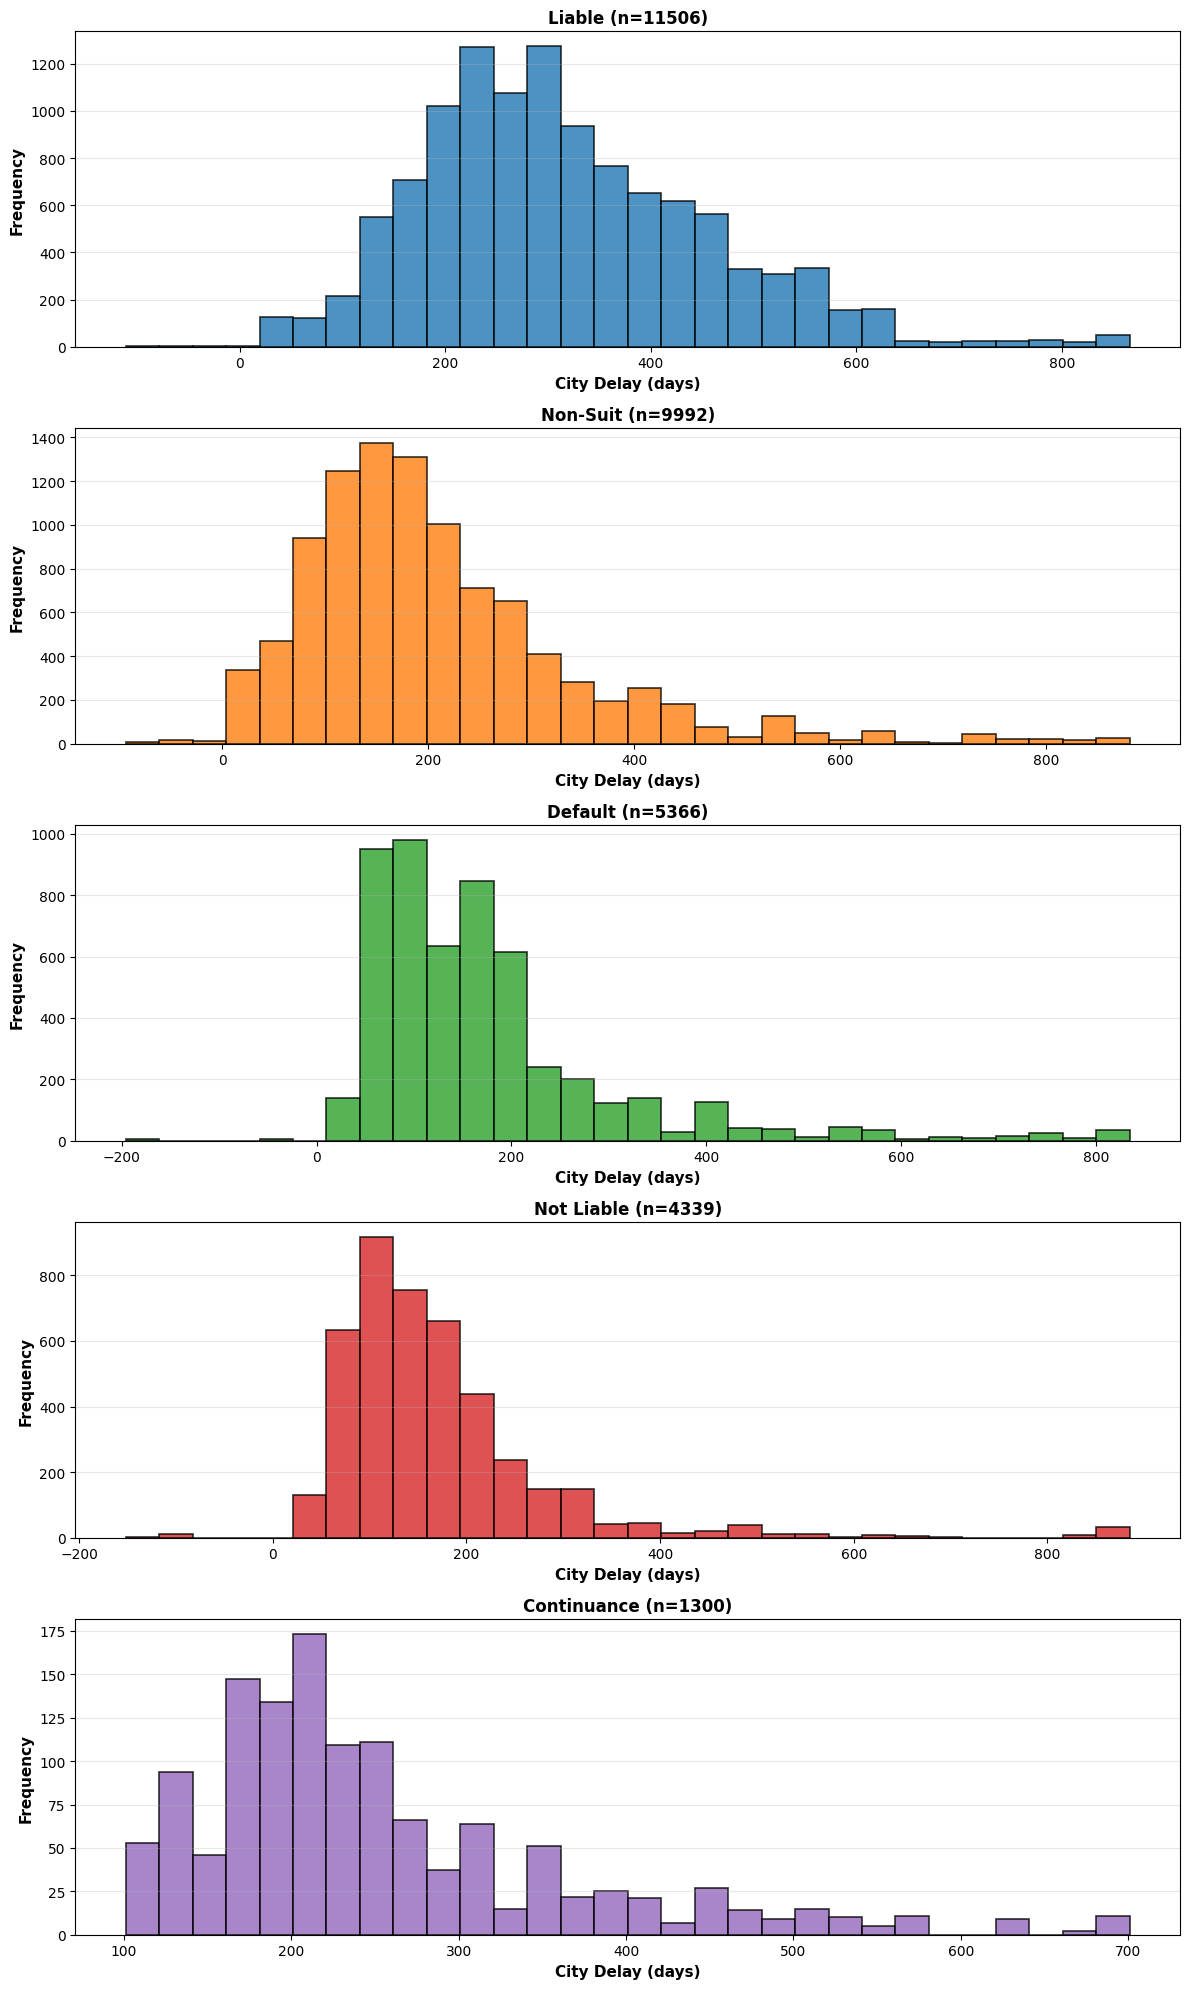

In [412]:
# Create histograms for CityDelay by Case Disposition

# Define a list of 5 distinct colors (one for each case disposition type)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Get the list of top 5 dispositions we filtered above
dispositions = top_5_dispositions

# Create a figure with multiple subplots stacked vertically (5 rows, 1 column)
# Each subplot will show one histogram for one case disposition type
fig, axes = plt.subplots(5, 1, figsize=(12, 4 * 5))

# Loop through each disposition and create a histogram for it
for idx, disposition in enumerate(dispositions):
    # Filter data: get all CityDelay values for this specific case disposition
    # .dropna() removes any missing values (null/NaN entries)
    disp_data = df_ward_filtered[df_ward_filtered['CASE DISPOSITION'] == disposition]['CityDelay'].dropna()
    
    # Handle outliers by using the 99th percentile
    limit = disp_data.quantile(0.99)

    # Filter to keep only data points at or below the 99th percentile
    plot_data = disp_data[disp_data <= limit]
    
    # Create a histogram on the current subplot (axes[idx])
    # bins=30 means divide the data into 30 equal-width buckets
    axes[idx].hist(plot_data, bins=30, color=colors[idx], edgecolor='black', linewidth=1.2, alpha=0.8)
    
    # Label the x-axis (horizontal axis) to show it represents days of delay
    axes[idx].set_xlabel('City Delay (days)', fontsize=11, fontweight='bold')
    
    # Label the y-axis (vertical axis) to show it represents frequency/count
    axes[idx].set_ylabel('Frequency', fontsize=11, fontweight='bold')
    
    # Set the title for this histogram, showing the disposition name and total sample size (n)
    axes[idx].set_title(f'{disposition} (n={len(disp_data)})', fontsize=12, fontweight='bold')
    
    # Add a light grid to the y-axis only to make it easier to read values
    axes[idx].grid(True, axis='y', alpha=0.3)

# Automatically adjust spacing between subplots to prevent overlap
plt.tight_layout()

# Save the entire figure as a PNG image to the outputs folder
# dpi=300 means high resolution (300 dots per inch)
plt.savefig(out_dir / 'citydelay_by_disposition_histograms.png', dpi=300, bbox_inches='tight')

# Print a confirmation message to show the file was saved successfully
print(" Histograms saved to outputs/citydelay_by_disposition_histograms.png")

# Display the figure in the notebook
plt.show()

### Task 11.2: Explain the plots

**What the plot shows:**

The histograms display the processing time (in days) from violation date to hearing date for each of the 5 most common case dispositions in Ward 20. This reveals how quickly the city handles different types of building violation cases.

**Key findings that stand out:**

1. **Liable Cases are MODERATELY DELAYED (~200-300 days peak):**
   - The histogram shows a broad, relatively normal distribution centered around 250-300 days
   - The distribution is more spread out than Default cases, suggesting more variability
   - *Why:* Even though the defendant is found liable, the process involves evidence review, hearings, and official rulings, which takes substantial time

2. **Non-Suit Cases have HIGH VARIABILITY (200-400+ days, very dispersed):**
   - The histogram shows a wide, dispersed distribution with a long right tail extending past 800+ days
   - This is the most variable disposition with some cases taking exceptionally long
   - *Why:* "Non-suit" cases often involve dismissals, procedure issues, or settlements that require back-and-forth negotiation. Some cases get stuck or require multiple filings, explaining the extreme range

3. **Default Cases are FASTEST & MOST CONCENTRATED (~100-200 days):**
   - The histogram shows a sharp, tight peak with the shortest range of delays
   - Most cases cluster tightly between 50-250 days
   - *Why:* When defendants don't appear, the ruling is automatic and quick—no need for evidence review or trial proceedings

**Overall** Cases requiring judicial review (Liable, Non-Suit, Continuance) take significantly longer than administrative rulings (Default). The more procedurally complex a case, the more variable the processing time.


### Task 12: Build another plot

In [413]:
# Create a bar plot showing average imposed fine by case disposition
# Calculate average fine for each disposition in the filtered dataset
avg_fine_by_disposition = df_ward_filtered.groupby('CASE DISPOSITION')['IMPOSED FINE'].mean().sort_values(ascending=False)
avg_fine_by_disposition

CASE DISPOSITION
Default        4949.585352
Liable          958.195952
Continuance      38.846154
Non-Suit         31.925540
Not Liable        2.880848
Name: IMPOSED FINE, dtype: float64

 Bar plot saved to outputs/avg_fine_by_disposition_barplot.png


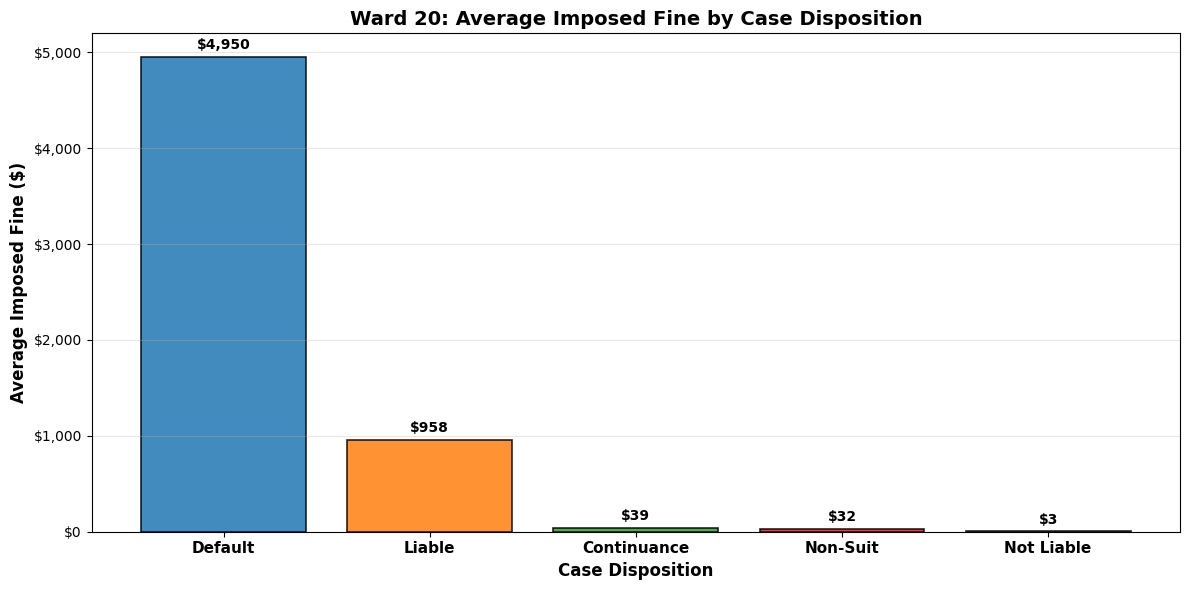

In [414]:
# Create the bar plot using the colors defined above
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(avg_fine_by_disposition)), avg_fine_by_disposition.values, 
               color=colors, edgecolor='black', linewidth=1.2, alpha=0.85)

# Set x-axis labels to disposition names
plt.xticks(range(len(avg_fine_by_disposition)), avg_fine_by_disposition.index, fontsize=11, fontweight='bold')

# Label axes
plt.xlabel('Case Disposition', fontsize=12, fontweight='bold')
plt.ylabel('Average Imposed Fine ($)', fontsize=12, fontweight='bold')
plt.title(f'Ward {chosen_ward}: Average Imposed Fine by Case Disposition', fontsize=14, fontweight='bold')

# Format y-axis as currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add grid for easier reading
plt.grid(True, axis='y', alpha=0.3)

# Add value labels on top of each bar
for i, (bar, value) in enumerate(zip(bars, avg_fine_by_disposition.values)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 50, f'${value:,.0f}', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig(out_dir / 'avg_fine_by_disposition_barplot.png', dpi=300, bbox_inches='tight')
print(" Bar plot saved to outputs/avg_fine_by_disposition_barplot.png")
plt.show()

In [415]:
# Print summary statistics
print("\nAverage Imposed Fine by Case Disposition (sorted from highest to lowest):")
print(avg_fine_by_disposition.to_string())


Average Imposed Fine by Case Disposition (sorted from highest to lowest):
CASE DISPOSITION
Default        4949.585352
Liable          958.195952
Continuance      38.846154
Non-Suit         31.925540
Not Liable        2.880848



**What the plot shows:**

The bar chart above displays the average imposed fine (penalty amount) for each of the 5 most common case dispositions in Ward 20 (we selected), sorted from highest to lowest. 

This reveals how the City's penalty structure varies significantly based on the legal outcome of each case.

**Key observations:**

1. **Default Cases ($4,950 - HIGHEST FINES):**
   - Default cases receive dramatically higher average fines than all other dispositions
   - The gap between Default ($4,950) and Liable ($958) is more than 5 times.
   - *Why:* When defendants fail to appear or respond, the City likely pursues the maximum penalty as enforcement. Default judgments may include automatic penalty assessments or higher starting fines to incentivize compliance and future appearances.

2. **Liable Cases ($958 - MODERATE):**
   - Second highest average fine, but still much lower than Default
   - *Why:* When the City proves the violation ("Liable"), penalties are assessed based on violation severity and evidence presented. These are proportional to the specific building code violation rather than punitive for non-appearance.

3. **Continuance Cases ($39 - VERY LOW):**
   - Cases postponed to future dates have minimal average fines
   - *Why:* Continuances are temporary postponements where no ruling has yet been made. Cases likely haven't reached adjudication, so no final penalty has been assessed. The small amount may represent procedural costs or interim penalties.

4. **Non-Suit Cases ($32 - VERY LOW):**
   - When plaintiffs withdraw cases, virtually no fines are imposed
   - *Why:* Non-suits represent dismissed cases—no violation was proven. The City has no grounds to impose penalties on dismissed claims.

5. **Not Liable Cases ($3 - LOWEST):**
   - Defendants found "Not Liable" face almost no financial penalty
   - *Why:* When the defendant is cleared of charges, the City cannot impose fines. The minimal amount may be rounding or administrative fees.

**Overall pattern & explanation:**

The data reveals a **clear legal principle**: penalties are tied to culpability and case outcome:

- **Failure to respond/appear (Default)** = Highest penalties (enforcement/deterrent)
- **Guilt proven (Liable)** = Moderate penalties (proportional to violation)  
- **No fault/dismissal (Not Liable, Non-Suit, Continuance)** = Minimal/no penalties (innocent until proven guilty)

This structure suggests the City uses the fine system not just for revenue, but as a compliance tool—penalizing non-engagement (Defaults) severely while reserving moderate penalties for proven violations.


### Task 13: Histogram that depicts the distriabution of admin costs

In [416]:
# Create a stacked histogram showing Admin Costs distribution by Case Disposition
# Clean the data: remove NaN values from ADMIN COSTS
admin_data = df_ward_filtered[['ADMIN COSTS', 'CASE DISPOSITION']].dropna()

# Convert ADMIN COSTS to numeric
admin_data['ADMIN COSTS'] = pd.to_numeric(admin_data['ADMIN COSTS'], errors='coerce')
admin_data = admin_data.dropna()

admin_data

,ADMIN COSTS,CASE DISPOSITION
6,40,Default
11,0,Non-Suit
21,0,Non-Suit
23,40,Default
31,0,Non-Suit
...,...,...
784110,0,Non-Suit
784129,0,Non-Suit
784168,40,Default
784204,40,Default


 Histogram saved to outputs/admin_costs_by_disposition_histogram.png


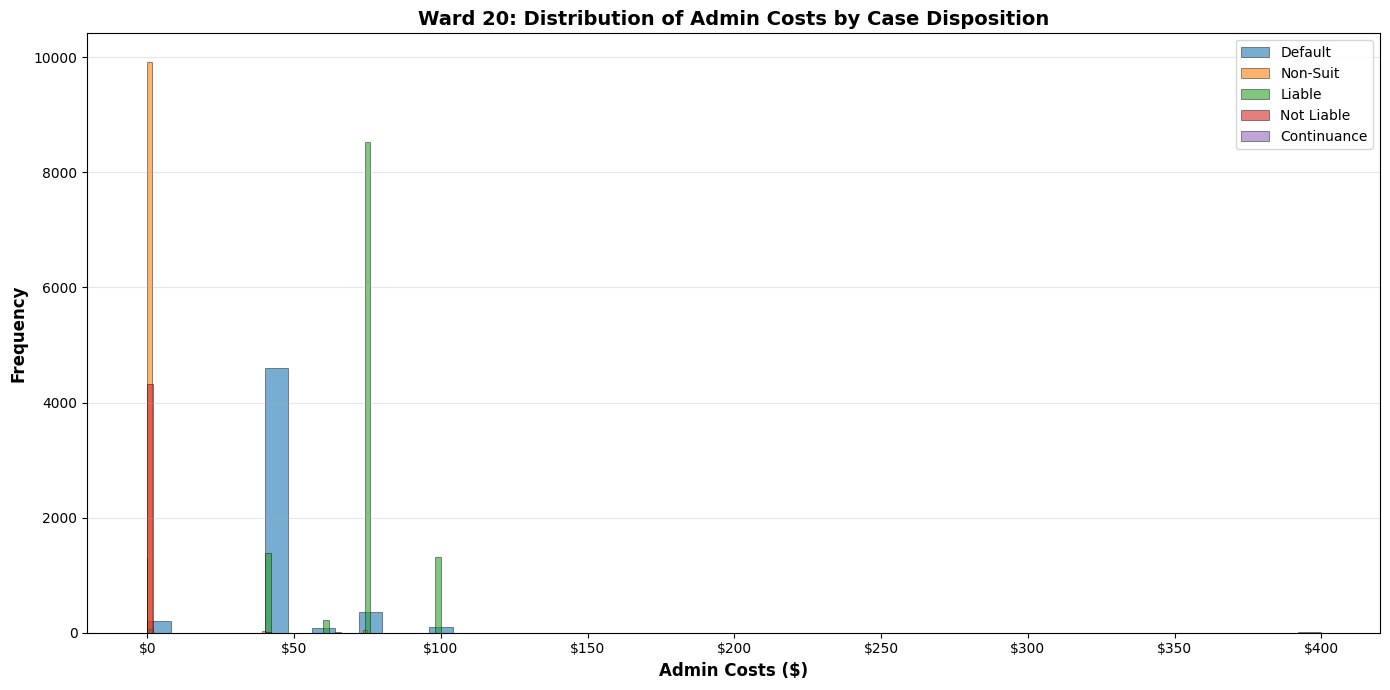

In [417]:
# Create the figure
plt.figure(figsize=(14, 7))

# Get unique dispositions
dispositions_list = admin_data['CASE DISPOSITION'].unique()

# Create a stacked histogram with no gaps between bins
# Use rwidth=1.0 to ensure no gaps between bins
for i, disposition in enumerate(dispositions_list):
    # Filter data for this disposition
    disp_costs = admin_data[admin_data['CASE DISPOSITION'] == disposition]['ADMIN COSTS']
    
    # Plot histogram for this disposition with alpha for transparency (for stacking effect)
    plt.hist(disp_costs, bins=50, alpha=0.6, label=disposition, color=colors[i], 
             edgecolor='black', linewidth=0.5)

# Label axes and title
plt.xlabel('Admin Costs ($)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title(f'Ward {chosen_ward}: Distribution of Admin Costs by Case Disposition', 
          fontsize=14, fontweight='bold')

# Add legend
plt.legend(fontsize=10, loc='upper right')

# Format x-axis as currency
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add grid
plt.grid(True, axis='y', alpha=0.3)

# Save and display
plt.tight_layout()
plt.savefig(out_dir / 'admin_costs_by_disposition_histogram.png', dpi=300, bbox_inches='tight')
print(" Histogram saved to outputs/admin_costs_by_disposition_histogram.png")
plt.show()



In [418]:
# Print summary statistics
print("\nAdmin Costs Summary by Case Disposition:")
print(admin_data.groupby('CASE DISPOSITION')['ADMIN COSTS'].describe())


Admin Costs Summary by Case Disposition:
                    count       mean        std  min   25%   50%   75%    max
CASE DISPOSITION                                                             
Continuance        1300.0   0.000000   0.000000  0.0   0.0   0.0   0.0    0.0
Default            5366.0  43.013418  20.680064  0.0  40.0  40.0  40.0  400.0
Liable            11513.0  72.959263  15.727875  0.0  75.0  75.0  75.0  100.0
Non-Suit           9992.0   0.440853   5.406442  0.0   0.0   0.0   0.0   75.0
Not Liable         4339.0   0.194745   3.703837  0.0   0.0   0.0   0.0  100.0


**What the plot shows:**

The histogram displays the distribution of administrative costs (processing fees) across the five most common case dispositions in Ward 20, with each disposition shown as a transparent overlay. 

Admin costs represent the operational expenses the City incurs in handling each building violation case.

**Key observations:**

1. **Non-Suit Cases Dominate at $0 (MASSIVE SPIKE):**

   - The tallest peak appears at $0 admin costs, dominated by Non-Suit cases (orange)
   - Nearly 10,000 Non-Suit cases have zero associated admin costs
   - *Why:* When a case is dismissed (non-suited), minimal administrative processing occurs. The City has already closed the file, so there are no ongoing costs to track or bill

2. **Liable Cases Show Concentrated Distribution ($50-75 range - NOTABLE CLUSTER):**
 
   - Liable cases (green) form a secondary peak around $50-75
   - This represents roughly 8,500 cases with moderate administrative costs
   - *Why:* Liable cases require full adjudication—evidence review, hearings, record-keeping, and official determinations. These legal proceedings generate consistent administrative overhead

3. **Default Cases Spread Across Mid-Range ($50-100+):**
 
   - Default cases (blue) show a broader distribution centered around $50-100
   - Approximately 4,500 cases distributed across this range
   - *Why:* Defaults still require administrative follow-up for non-response, collection attempts, and case closure documentation

4. **Not Liable & Continuance Cases Show Minimal Spread:**
 
   - Not Liable cases (red) and Continuance cases (purple) are sparsely distributed
   - These represent fewer total cases and cluster near lower cost ranges
   - *Why:* Not Liable cases are quickly dismissed (minimal paperwork). Continuance cases are merely postponed, so full administrative processing hasn't occurred yet

**Overall pattern & explanation:**

The histogram reveals a **stark cost-to-outcome relationship**:

- **Dismissed cases (Non-Suit)** = Zero admin costs (no resources expended)
- **Adjudicated cases (Liable, Default)** = Moderate, consistent costs ($50-100)
- **Incomplete/Dismissed cases (Not Liable, Continuance)** = Minimal costs

This suggests administrative costs directly reflect case complexity and judicial effort.

### Task 14: Another filter to show rows the top 5 most common type of Violation Description

In [419]:
# Display all unique VIOLATION DESCRIPTION values and their counts
violation_desc_counts = df_ward_filtered['VIOLATION DESCRIPTION'].value_counts()

print(f"\nTotal unique violation descriptions: {len(violation_desc_counts)}")
print("\nAll violation descriptions with counts:")
print(violation_desc_counts.to_string())



Total unique violation descriptions: 567

All violation descriptions with counts:
VIOLATION DESCRIPTION
Arrange for inspection of premises. (13-12-100)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            1814
Repair or replace defective or missing members of porch system. (13-196-570)   

In [420]:
# Get the top 5 most common VIOLATION DESCRIPTION values
top_5_descriptions = df_ward_filtered['VIOLATION DESCRIPTION'].value_counts().head(5)

print("\nTop 5 violation descriptions:")
for idx, (description, count) in enumerate(top_5_descriptions.items(), 1):
    print(f"{idx}. {description}: {count} cases")

print(f"\nTotal cases represented by top 5 descriptions: {top_5_descriptions.sum()}")
print(f"Percentage of dataset: {100 * top_5_descriptions.sum() / len(df_ward_filtered):.2f}%")



Top 5 violation descriptions:
1. Arrange for inspection of premises. (13-12-100): 1814 cases
2. Repair or replace defective or missing members of porch system. (13-196-570): 1351 cases
3. Repair exterior wall. (13-196-010, 13-196-530 B): 1162 cases
4. Post name, address, and telephone of owner, owner's agent for managing, controlling or collecting rents, and any other person managing or controlling building conspicuously where accessible or visible to public way. (13-12-030): 1054 cases
5. Replace broken, missing or defective window panes. (13-196-550 A): 795 cases

Total cases represented by top 5 descriptions: 6176
Percentage of dataset: 19.00%


In [421]:
# Filter to keep only rows with the 5 most common VIOLATION DESCRIPTION values
top_5_violation_descriptions = df_ward_filtered['VIOLATION DESCRIPTION'].value_counts().head(5).index.tolist()

df_ward_filtered_by_desc = df_ward_filtered[df_ward_filtered['VIOLATION DESCRIPTION'].isin(top_5_violation_descriptions)].copy()

print(f"\nOriginal df_ward_filtered shape: {df_ward_filtered.shape}")
print(f"Filtered by violation description shape: {df_ward_filtered_by_desc.shape}")
print(f"Rows removed: {df_ward_filtered.shape[0] - df_ward_filtered_by_desc.shape[0]}")



Original df_ward_filtered shape: (32510, 23)
Filtered by violation description shape: (6176, 23)
Rows removed: 26334


In [422]:
print(f"\nVIOLATION DESCRIPTION distribution in newly filtered dataset:")
print(df_ward_filtered_by_desc['VIOLATION DESCRIPTION'].value_counts())

print(f"\nNumber of rows in df_ward_filtered_by_desc: {len(df_ward_filtered_by_desc)}")



VIOLATION DESCRIPTION distribution in newly filtered dataset:
VIOLATION DESCRIPTION
Arrange for inspection of premises. (13-12-100)                                                                                                                                                                                        1814
Repair or replace defective or missing members of porch system. (13-196-570)                                                                                                                                                           1351
Repair exterior wall. (13-196-010, 13-196-530 B)                                                                                                                                                                                       1162
Post name, address, and telephone of owner, owner's agent for managing, controlling or collecting rents, and any other person managing or controlling building conspicuously where accessible or visible to pub

### Task 14.1 Shorten the long descriptions

In [423]:
# Create a mapping from full violation descriptions to short labels
violation_desc_mapping = {
    'Arrange for inspection of premises. (13-12-100)': 'Inspection Access',
    'Repair or replace defective or missing members of porch system. (13-196-570)': 'Porch System',
    'Repair exterior wall. (13-196-010, 13-196-530 B)': 'Exterior Wall',
    'Post name, address, and telephone of owner, owner\'s agent for managing, controlling or collecting rents, and any other person managing or controlling building conspicuously where accessible or visible to public way. (13-12-030)': 'Owner Info',
    'Replace broken, missing or defective window panes. (13-196-550 A)': 'Window Panes'
}


In [424]:
print("Violation Description Shortening Mapping:")

for full, short in violation_desc_mapping.items():
    print(f"\nORIGINAL: {full}")
    print(f"SHORT:    {short}")

Violation Description Shortening Mapping:

ORIGINAL: Arrange for inspection of premises. (13-12-100)
SHORT:    Inspection Access

ORIGINAL: Repair or replace defective or missing members of porch system. (13-196-570)
SHORT:    Porch System

ORIGINAL: Repair exterior wall. (13-196-010, 13-196-530 B)
SHORT:    Exterior Wall

ORIGINAL: Post name, address, and telephone of owner, owner's agent for managing, controlling or collecting rents, and any other person managing or controlling building conspicuously where accessible or visible to public way. (13-12-030)
SHORT:    Owner Info

ORIGINAL: Replace broken, missing or defective window panes. (13-196-550 A)
SHORT:    Window Panes


In [425]:
# Apply the mapping to create a new column with shortened descriptions
df_ward_filtered_by_desc['VIOLATION_SHORT'] = df_ward_filtered_by_desc['VIOLATION DESCRIPTION'].map(violation_desc_mapping)

print("\nDataset with shortened violation descriptions:")
print(f"Shape: {df_ward_filtered_by_desc.shape}")



Dataset with shortened violation descriptions:
Shape: (6176, 24)


In [426]:
print(f"\nFirst 10 rows (showing original and shortened descriptions):")
print(df_ward_filtered_by_desc[['VIOLATION DESCRIPTION', 'VIOLATION_SHORT']].head(10))


First 10 rows (showing original and shortened descriptions):
                                 VIOLATION DESCRIPTION    VIOLATION_SHORT
11     Arrange for inspection of premises. (13-12-100)  Inspection Access
96     Arrange for inspection of premises. (13-12-100)  Inspection Access
182    Arrange for inspection of premises. (13-12-100)  Inspection Access
224    Arrange for inspection of premises. (13-12-100)  Inspection Access
227   Repair exterior wall. (13-196-010, 13-196-530 B)      Exterior Wall
541   Repair exterior wall. (13-196-010, 13-196-530 B)      Exterior Wall
613  Repair or replace defective or missing members...       Porch System
634  Replace broken, missing or defective window pa...       Window Panes
808  Replace broken, missing or defective window pa...       Window Panes
830  Repair or replace defective or missing members...       Porch System


In [427]:
print(f"\nDistribution of shortened violation descriptions:")
print(df_ward_filtered_by_desc['VIOLATION_SHORT'].value_counts())


Distribution of shortened violation descriptions:
VIOLATION_SHORT
Inspection Access    1814
Porch System         1351
Exterior Wall        1162
Owner Info           1054
Window Panes          795
Name: count, dtype: int64


In [428]:
# Calculate mean imposed fine for each violation description
mean_fine_by_violation = df_ward_filtered_by_desc.groupby('VIOLATION_SHORT')['IMPOSED FINE'].mean().sort_values(ascending=False)

print("Mean Imposed Fine by Violation Type (sorted highest to lowest):")
print(mean_fine_by_violation.to_string())

Mean Imposed Fine by Violation Type (sorted highest to lowest):
VIOLATION_SHORT
Window Panes         1538.836478
Exterior Wall        1204.561102
Porch System         1107.091044
Owner Info           1041.437381
Inspection Access     853.572216


### Task 15: Create a barplot


 Bar plot saved to outputs/mean_fine_by_violation_type.png


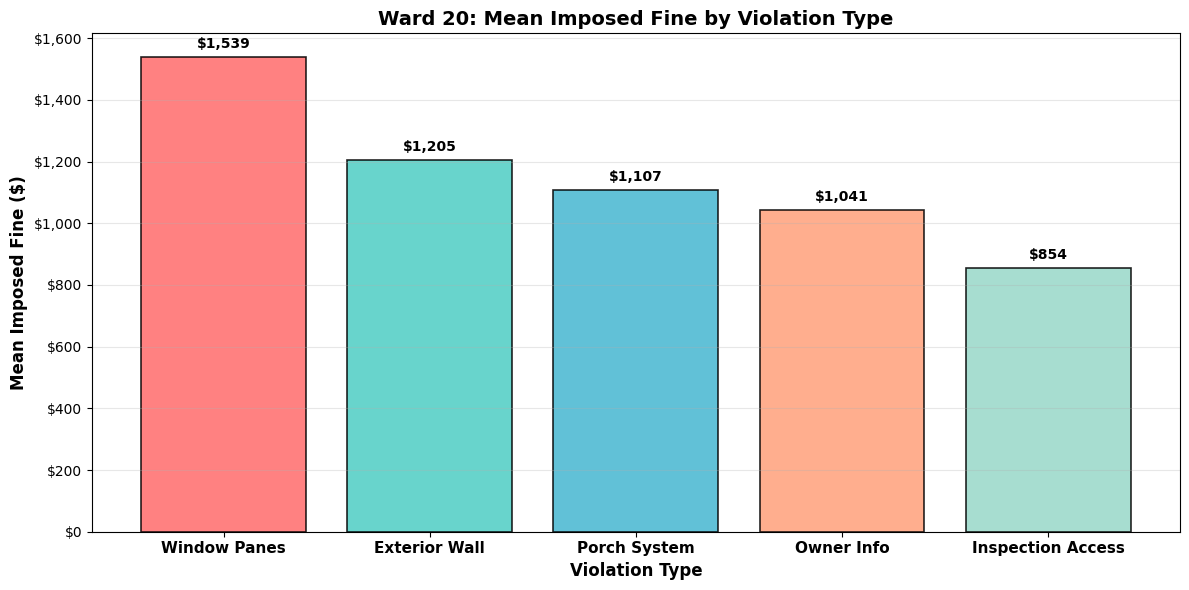

In [429]:
# Create a bar plot showing mean imposed fine by violation type
plt.figure(figsize=(12, 6))

# Define a custom color palette
violation_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

bars = plt.bar(range(len(mean_fine_by_violation)), mean_fine_by_violation.values, 
               color=violation_colors, edgecolor='black', linewidth=1.2, alpha=0.85)

# Set x-axis labels to violation short names
plt.xticks(range(len(mean_fine_by_violation)), mean_fine_by_violation.index, fontsize=11, fontweight='bold')

# Label axes
plt.xlabel('Violation Type', fontsize=12, fontweight='bold')
plt.ylabel('Mean Imposed Fine ($)', fontsize=12, fontweight='bold')
plt.title(f'Ward {chosen_ward}: Mean Imposed Fine by Violation Type', fontsize=14, fontweight='bold')

# Format y-axis as currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add grid for easier reading
plt.grid(True, axis='y', alpha=0.3)

# Add value labels on top of each bar
for i, (bar, value) in enumerate(zip(bars, mean_fine_by_violation.values)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 20, f'${value:,.0f}', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig(out_dir / 'mean_fine_by_violation_type.png', dpi=300, bbox_inches='tight')
print("\n Bar plot saved to outputs/mean_fine_by_violation_type.png")
plt.show()

**What this plot shows:**

The bar chart displays the average penalty amount imposed for each of the 5 most common building violation types in Ward 20, sorted from highest to lowest fines. This reveals which violation categories the City penalizes most heavily.

**Key findings (sorted by severity of penalties):**

1. **Window Panes ($1,539 - HIGHEST FINE):**
   - Nearly double the fine for Inspection Access violations
   - *Why:* Windows are critical for building safety, security, and weatherproofing. Broken/missing window panes expose interiors to weather damage, pest infiltration, and security risks. The high fine incentivizes rapid replacement to prevent escalating property damage.

2. **Exterior Wall ($1,205 - SECOND HIGHEST):**
   - Structural integrity is paramount—exterior walls protect the entire building
   - *Why:* Wall deterioration compromises structural stability and exposes the building to water damage, mold, and potential collapse. The city prioritizes these repairs through substantial fines.

3. **Porch System ($1,107 - MODERATE-HIGH):**
   - Porches are structural extensions that can fail and injure occupants if neglected
   - *Why:* Failed porch systems pose immediate safety hazards (collapse risk). The moderate-high fine reflects the danger but is lower than walls because they're secondary structures.

4. **Owner Info ($1,041 - MODERATE):**
   - Administrative requirement to post owner contact information
   - *Why:* This is primarily a compliance/administrative issue—it doesn't directly threaten building safety but allows tenants/city to contact responsible parties. Fines are moderate to encourage compliance without excessive punishment.

5. **Inspection Access ($854 - LOWEST FINE):**
   - Administrative requirement to allow city inspectors access
   - *Why:* This is the least "structural"—it's about process and cooperation. The lower fine reflects that violation of inspection access is more about obstructing oversight than causing direct physical harm.

**Overall pattern & explanation:**

The fines follow a clear **safety hierarchy**:

| Rank | Violation Type | Fine | Category |
|---|---|---|---|
| 1 | Window Panes | $1,539 | **Critical Safety** (weatherproofing, security) |
| 2 | Exterior Wall | $1,205 | **Structural Integrity** (building stability) |
| 3 | Porch System | $1,107 | **Secondary Structure** (occupant safety) |
| 4 | Owner Info | $1,041 | **Administrative** (compliance, accountability) |
| 5 | Inspection Access | $854 | **Procedural** (oversight/cooperation) |

**Conclusion:**

The City's fine structure is **risk-based**: violations threatening immediate physical safety and structural integrity receive substantially higher penalties ($1,200-$1,500 range) than administrative compliance issues ($850-$1,000 range). 

This strategy incentivizes building owners to focus on life-safety issues first, then handle administrative requirements second.
